In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_reviews.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [4]:
df_reviews['userId'].value_counts()

414 2698
599 2478
474 2108
448 1864
274 1346
 ... 
442 20
569 20
320 20
576 20
53 20
Name: userId, Length: 610, dtype: int64

In [5]:
df_movies_titles = pd.read_csv('movies.csv',index_col=False)
df_movies_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df = pd.merge(df_reviews,df_movies_titles,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
df.describe()

,userId,movieId,rating,timestamp
count,98180.000000,98180.000000,98180.000000,9.818000e+04
mean,326.348747,15938.331259,3.502567,1.197962e+09
std,182.344624,28668.177407,1.040068,2.135274e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1193.000000,3.000000,1.008558e+09
50%,325.000000,2890.000000,3.500000,1.179177e+09
75%,477.000000,7121.000000,4.000000,1.428575e+09
max,610.000000,131237.000000,5.000000,1.537799e+09


In [8]:
df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
df_ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [9]:
movie_matrix = df.pivot_table(index='userId',columns='title',values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...,Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Avatar_user_rating = movie_matrix['Avatar (2009)']
Avatar_user_rating = Avatar_user_rating.dropna()
Avatar_user_rating.head()

userId
10 2.5
15 3.0
18 4.0
21 4.0
22 3.5
Name: Avatar (2009), dtype: float64

In [11]:
similar_to_Avatar = movie_matrix.corrwith(Avatar_user_rating)
corr_Avatar = pd.DataFrame(similar_to_Avatar,columns=['correlation'])
corr_Avatar.dropna(inplace=True)
corr_Avatar = corr_Avatar.join(df_ratings['number_of_ratings'])
corr_Avatar.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.353553,17
(500) Days of Summer (2009),0.131120,42
*batteries not included (1987),0.785714,7
10 Things I Hate About You (1999),0.265637,54
"10,000 BC (2008)",-0.075431,17


In [12]:
corr_Avatar[df_ratings['number_of_ratings']>100].sort_values(by='correlation',ascending=False).head(10)

,correlation,number_of_ratings
title,,
Trainspotting (1996),0.623735,102
"Monsters, Inc. (2001)",0.541616,132
"Net, The (1995)",0.530552,112
Finding Nemo (2003),0.501461,141
"Matrix, The (1999)",0.493241,278
Die Hard: With a Vengeance (1995),0.466794,144
Men in Black (a.k.a. MIB) (1997),0.459441,165
Star Wars: Episode VI - Return of the Jedi (1983),0.458785,196
"Terminator, The (1984)",0.448443,131


In [14]:
Thor_user_rating = movie_matrix['Thor (2011)']
Thoe_user_rating = Thor_user_rating.dropna()
Thor_user_rating

userId
1 NaN
2 NaN
3 NaN
4 NaN
5 NaN
 ... 
606 NaN
607 NaN
608 NaN
609 NaN
610 3.5
Name: Thor (2011), Length: 610, dtype: float64

In [15]:
similar_to_Thor = movie_matrix.corrwith(Thor_user_rating)
similar_to_Thor

title
'71 (2014) NaN
'Hellboy': The Seeds of Creation (2004) NaN
'Round Midnight (1986) NaN
'Salem's Lot (2004) NaN
'Til There Was You (1997) NaN
 ... 
eXistenZ (1999) 0.917663
xXx (2002) 0.345586
xXx: State of the Union (2005) -0.970725
¡Three Amigos! (1986) 0.914659
À nous la liberté (Freedom for Us) (1931) NaN
Length: 8747, dtype: float64

In [16]:
corr_Thor = pd.DataFrame(similar_to_Thor,columns=['correlation'])
corr_Thor.dropna(inplace=True)
corr_Thor = corr_Thor.join(df_ratings['number_of_ratings'])
corr_Thor.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.997176,17
(500) Days of Summer (2009),0.386820,42
10 Things I Hate About You (1999),0.273560,54
"10,000 BC (2008)",0.245718,17
101 Dalmatians (1996),0.089730,47


In [17]:
corr_Thor[df_ratings['number_of_ratings']>100].sort_values(by='correlation',ascending=False).head(10)

,correlation,number_of_ratings
title,,
Stargate (1994),0.759494,140
Aladdin (1992),0.730377,183
Jurassic Park (1993),0.714481,238
"Lion King, The (1994)",0.710244,172
"Bourne Identity, The (2002)",0.705183,112
X-Men (2000),0.670755,133
Up (2009),0.665904,105
Batman Begins (2005),0.665208,116
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.658109,107


array([[%lt;Axes: title={'center': 'rating'}%gt;,
 %lt;Axes: title={'center': 'number_of_ratings'}%gt;]], dtype=object)

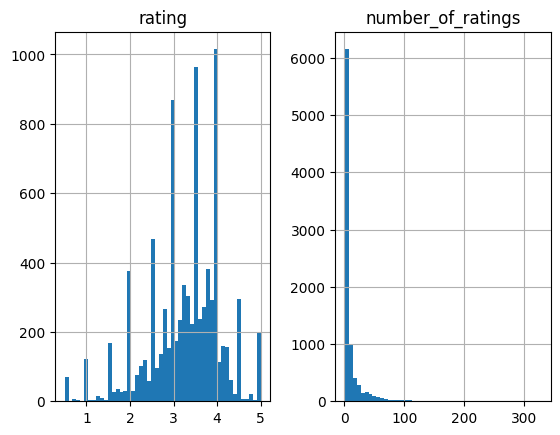

In [18]:
df_ratings.hist(bins=50)

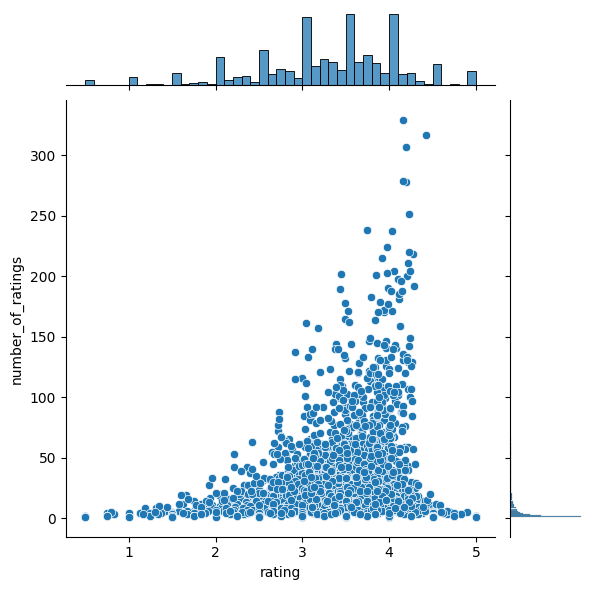

In [20]:
sns.jointplot(x='rating',y='number_of_ratings',data=df_ratings)